## 데이터 인코딩

### 레이블 인코딩(Label encoding)
- pandas 라이브러리의 map 함수 사용

In [1]:
import pandas as pd

In [2]:
# 인코딩 실습을 위한 데이터프레임 생성
df = pd.DataFrame({'item':['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [3]:
# 매핑(mapping)에 사용할 item_map 생성
item_map = { 'TV': 0, '냉장고': 1, '믹서': 2, '선풍기': 3, '전자렌지': 4, '컴퓨터': 5}

In [4]:
# item 컬럼을 item_map과 매핑한 item_code 컬럼 생성
df['item_code'] = df['item'].map(item_map)
df

# 실제로 머신러닝을 수행할 때는 학습에 불필요한 item 컬럼 삭제

,item,item_code
0,TV,0
1,냉장고,1
2,전자렌지,4
3,컴퓨터,5
4,선풍기,3
5,선풍기,3
6,믹서,2
7,믹서,2


### 원-핫 인코딩(One-Hot encoding)
- pandas 라이브러리의 pd.get_dummies() 사용

In [5]:
import pandas as pd

In [6]:
# 데이터프레임 생성
df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [7]:
# item 컬럼을 인코딩한 값 조회(원본 변환 x)
pd.get_dummies(df, columns=['item'])

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [8]:
# prefix: 인코딩 변수 앞에 붙는 내용을 변경
pd.get_dummies(df, columns=['item'], prefix='아이템')

,아이템_TV,아이템_냉장고,아이템_믹서,아이템_선풍기,아이템_전자렌지,아이템_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 데이터(Feature) 스케일링

### 표준화(Standardization)
- StandardScaler
- 데이터를 정규분포로 변환하는 두 가지 방법 중 한 가지
 - 표준화(standardization)
 - 로그 변환(log transformation)
 - 대체로 표준화에 비해 로그 변환의 성능이 우수

In [9]:
# 붓꽃(iris) 데이터 표준화
from sklearn.datasets import load_iris
import pandas as pd

In [10]:
# iris 데이터 로드
iris = load_iris()

# feature(iris.data)를 추출하여 데이터프레임에 저장
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 평균값')
print(iris_df.mean())
print()
print('feature 분산값')
print(iris_df.var())

feature 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [11]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 표준화 수행 및 변환
iris_scaled = scaler.fit_transform(iris_df)

# 표준화 데이터 -> 데이터프레임 변환(iris_df와 동일한 컬럼명 사용)
# iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)
iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris_df.columns)

print('feature 평균값')
print(iris_df_scaled.mean())
print()
print('feature 분산값')
print(iris_df_scaled.var())

feature 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### 표준화 작업의 의의
- 수치형 데이터의 크기가 중요하게 작용하는 거리 기반/선형 계열 알고리즘의 예측 성능 향상
- 선형 회귀(linear regression) 역시 거리 기반의 알고리즘
- 숫자의 크기가 의미 없는 트리(tree) 계열 알고리즘의 경우 표준화 작업 무의미

#### 원본 데이터와 표준화된 데이터의 예측 성능을 비교하기 위한 실습

In [12]:
import pandas as pd

In [13]:
# 샘플 데이터 생성
X1 = [1, 5, 7, 11, 2, 3, 5, 9, 7, 10, 12, 13, 14, 15, 16, 11, 12, 13, 16, 14,
      25, 27, 28, 25, 23, 25, 26, 21, 29, 30]
X2 = [100, 101, 110, 120, 110, 100, 105, 130, 15, 120, 200, 210, 220, 230, 240,
      260, 250, 400, 320, 550, 700, 720, 820, 1000, 930, 620, 650, 980, 620, 730]
Y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1]

# 데이터프레임에 저장
df = pd.DataFrame({'score1':X1, 'score2':X2, 'label':Y})
df

,score1,score2,label
0,1,100,0
1,5,101,0
2,7,110,0
3,11,120,0
4,2,110,0
5,3,100,0
6,5,105,0
7,9,130,0
8,7,15,0
9,10,120,0


#### 데이터셋 분할

In [14]:
from sklearn.model_selection import train_test_split

y_target = df.label # target 할당
x_feature = df.drop('label', axis=1) # feature 할당(target 제외)

# 학습/테스트 데이터 분할(default test_size: 25%)
# 레이블(y_target)을 기준으로 데이터를 균등하게 분할(stratify=y_target)
train_x, test_x, train_y, test_y = train_test_split(x_feature, y_target,
                                                    stratify=y_target,
                                                    random_state=35)

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(22, 2) (22,)
(8, 2) (8,)


### 모델 생성(KNeighborsClassifier)
- 주변에 가깝게 분포한 데이터의 값을 바탕으로 테스트 데이터의 값을 예측하는 거리 기반 분류 알고리즘

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 객체 생성, 모델 학습
kn = KNeighborsClassifier()
kn.fit(train_x, train_y)

# 예측 정확도 출력
kn.score(test_x, test_y)

# 예측 정확도 1.0 -> 샘플로 생성한 작은 데이터이므로 학습 데이터에 과적합

1.0

#### 데이터 예측 및 분포 확인

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

New data: ([18], [550])
Prediction of new data: [1]



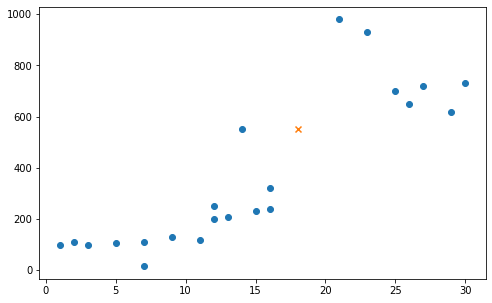

In [22]:
# (score1, score2) = (18, 550)의 새로운 데이터 분류 예측

# 새로운 데이터를 데이터프레임(new_data)에 저장
new_data = pd.DataFrame({'score1':[18], 'score2':[550]}) # values: 리스트 형태
print(f"New data: ({new_data['score1'].values}, {new_data['score2'].values})")

# 예측 수행
pred = kn.predict(new_data)
print(f'Prediction of new data: {pred}')
print()

plt.figure(figsize=(8, 5))
plt.scatter(train_x['score1'], train_x['score2']) # 학습 데이터
plt.scatter(new_data['score1'], new_data['score2'], marker='x') # new_data
plt.show()

# 새로운 데이터의 예측 결과는 1
# 그래프 상의 파란색 포인트는 학습 데이터, 주황색 포인트는 new_data
# 레이블이 1인 데이터는 대부분 오른쪽 상단, 0인 데이터는 왼쪽 하단에 위치

#### 이웃 데이터 확인

In [26]:
# KNeighborsClassifier: 주변 데이터와의 거리를 기반으로 값을 예측하는 알고리즘

# kneighbors(): test 데이터와 가장 가까운 이웃 데이터까지의 거리와 이웃 데이터의 인덱스 반환
# default K(이웃 데이터의 개수): 5
# numpy 2차원 배열 형태(이중 대괄호)로 결과값 반환
dist, idx = kn.kneighbors(new_data)
print('Distances:', dist)
print('Indexes:', idx)
print()

train_x

# kneighbors 알고리즘이 반환한 인덱스는 명칭 기반이 아닌 위치 기반의 인덱스
# train_x 기준 위에서부터 5, 19, ... , 12번 인덱스의 위치에 있는 데이터 -> 이웃 데이터
# 이웃 데이터 값을 찾기 위해 train_x 인덱스 재정렬 필요

Distances: [[  4.          70.85901495 100.31948963 150.1632445  170.2380686 ]]
Indexes: [[ 5 19  6  3 12]]



,score1,score2
14,16,240
6,5,105
29,30,730
20,25,700
24,23,930
19,14,550
26,26,650
13,15,230
7,9,130
27,21,980


In [33]:
# train_x 인덱스 재설정
train_x = train_x.reset_index(drop=True)

# 2차원 배열을 활용 가능한 1차원 리스트 형태로 변환
idx = idx.flatten()
print(idx)
print()

# idx 요소를 인덱스로 가지는 train_x 데이터 추출(이웃 데이터)
train_x.loc[train_x.index.isin(idx)]

[ 5 19  6  3 12]



,score1,score2
3,25,700
5,14,550
6,26,650
12,27,720
19,29,620


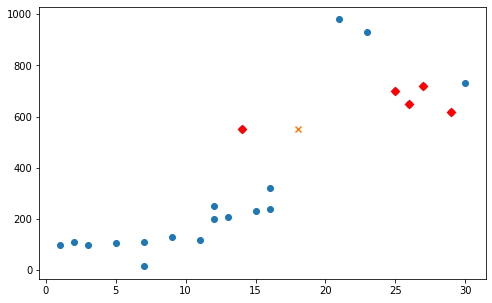

In [34]:
# kneighbors 알고리즘이 반환한 이웃 데이터의 분포 확인

plt.figure(figsize=(8, 5))

plt.scatter(train_x['score1'], train_x['score2'])
plt.scatter(new_data['score1'], new_data['score2'], marker='x')

# 이웃 데이터 시각화 -> (x, y) = (score1, score2)
plt.scatter(train_x.loc[train_x.index.isin(idx), 'score1'],
            train_x.loc[train_x.index.isin(idx), 'score2'], marker='D', c='r')

plt.show()

# 5개의 이웃 데이터 중 4개의 레이블이 1이므로 예측값 1을 반환
# but, 시각화 해보면 오히려 레이블이 0인 데이터 그룹에 가까이 분포
# 표준화된 데이터의 분포와 예측값도 확인해볼 필요가 있다고 판단

#### 데이터(feature) 표준화 수행

In [35]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 표준화 수행 및 변환
x_scaled = scaler.fit_transform(x_feature)

# numpy 배열 형태의 표준화 데이터(x_scaled)를 데이터프레임으로 변환
df_scaled = pd.DataFrame(data=x_scaled, columns=x_feature.columns)

df_scaled['label'] = df['label'] # 원본 데이터의 레이블 그대로 사용
df_scaled

,score1,score2,label
0,-1.649009,-0.954062,0
1,-1.183407,-0.950757,0
2,-0.950605,-0.921015,0
3,-0.485003,-0.887968,0
4,-1.532609,-0.921015,0
5,-1.416208,-0.954062,0
6,-1.183407,-0.937538,0
7,-0.717804,-0.854921,0
8,-0.950605,-1.234960,0
9,-0.601403,-0.887968,0


In [36]:
from sklearn.model_selection import train_test_split

# 표준화된 데이터 분할
y_target = df_scaled.label
x_scaled_feature = df_scaled.drop('label', axis=1)

# 학습/테스트 데이터 분할
train_x, test_x, train_y, test_y = train_test_split(x_scaled_feature, y_target,
                                                   stratify=y_target,
                                                   random_state=35)

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(22, 2) (22,)
(8, 2) (8,)


In [37]:
# KNeighborsClassifier 모델 생성

from sklearn.neighbors import KNeighborsClassifier

# 모델 객체 생성, 모델 학습
kn = KNeighborsClassifier()
kn.fit(train_x, train_y)

# 예측 정확도 출력
kn.score(test_x, test_y)

1.0

Prediction of new data(scaled): [0]



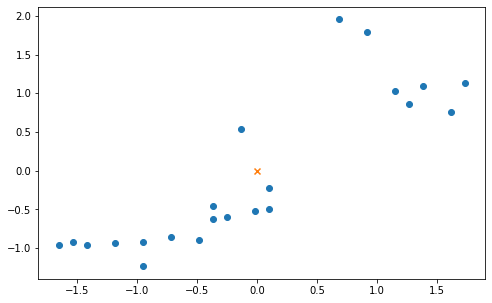

In [38]:
# 데이터 예측 및 분포 확인

# new_data 표준화 작업
new_data = pd.DataFrame({'score1':[18], 'score2':[550]})
new_scaled = scaler.fit_transform(new_data)

# numpy 배열 -> 데이터프레임 변환
df_new_scaled = pd.DataFrame(new_scaled, columns=['score1', 'score2'])

# 예측 수행
pred = kn.predict(df_new_scaled)
print(f'Prediction of new data(scaled): {pred}')
print()

plt.figure(figsize=(8,5))
plt.scatter(train_x['score1'], train_x['score2']) # 표준화된 학습 데이터
plt.scatter(df_new_scaled['score1'], df_new_scaled['score2'], marker='x')
plt.show()

# 표준화된 데이터로 예측한 결과는 0
# 그래프에서도 표준화 이전에 비해 레이블이 0인 데이터에 가까운 것을 확인 가능

In [39]:
# 표준화된 new_data의 이웃 데이터 확인
dist, idx = kn.kneighbors(df_new_scaled) #5개 데이터의 거리, 인덱스 반환
print('Distances:', dist)
print('Indexes:', idx)
print()

# 데이터를 표준화하여 크기가 작아지면서 절대적인 거리도 감소

Distances: [[0.24688557 0.50088841 0.52481175 0.55007187 0.58818438]]
Indexes: [[16  0  7  5 11]]



In [41]:
# train_x 인덱스 재설정 -> train_x_scaled
train_x_scaled = train_x.reset_index(drop=True)

# 2차원 배열 -> 1차원 리스트 변환
idx = idx.flatten()
print(idx)
print()

# idx 요소를 인덱스로 가지는 데이터 추출
train_x_scaled.loc[train_x_scaled.index.isin(idx)]

[16  0  7  5 11]



,score1,score2
0,0.097001,-0.491406
5,-0.135801,0.533045
7,-0.019400,-0.524453
11,-0.368602,-0.458359
16,0.097001,-0.227032


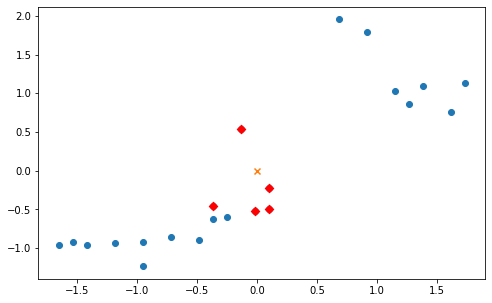

In [42]:
# 이웃 데이터의 분포 시각화

plt.figure(figsize=(8, 5))

plt.scatter(train_x['score1'], train_x['score2'])
plt.scatter(df_new_scaled['score1'], df_new_scaled['score2'], marker='x')

plt.scatter(train_x_scaled.loc[train_x_scaled.index.isin(idx), 'score1'],
            train_x_scaled.loc[train_x_scaled.index.isin(idx), 'score2'],
            marker='D', c='r')

plt.show()

# 새로운 데이터와 5개의 이웃 데이터가 모두 레이블이 0인 데이터 그룹에 분포
# 표준화 이후 알고리즘의 예측 성능 향상 -> but, 항상 그렇다고 단정 x

### 정규화(Normalization)
- MinMaxScaler

In [45]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

##### 영화 평점 예시 #####
# 1~10의 값을 가지는 다음영화 평점과 1~5의 값을 가지는 네이버영화 평점 정규화

movie = {'daum':[2, 4, 6, 8, 10],
         'naver':[1, 2, 3, 4, 5]}

movie_df = pd.DataFrame(movie) 

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화 수행 및 변환
movie_scaled = scaler.fit_transform(movie_df) 

# 데이터프레임 변환
movie_df_scaled = pd.DataFrame(movie_scaled, columns=['daum', 'naver'])
movie_df_scaled

# 정규화 이후 0과 1 사이의 값을 가지는 데이터

,daum,naver
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


####  붓꽃(iris) 데이터

In [46]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화 수행 및 변환
iris_scaled = scaler.fit_transform(iris_df)

# 정규화 데이터 -> 데이터프레임 변환
iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)
print('feature 최솟값')
print(iris_df_scaled.min())
print()
print('feature 최댓값')
print(iris_df_scaled.max())

# 0과 1 사이의 값 -> 최솟값: 0, 최댓값: 1

feature 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
